# Passive learning without random policy

We set a discount factor $\gamma = 0.95$ as we consider that future reward are very important. However, we don't set $\gamma = 0.95$ as we want to penalize state that are far from the solution

In [2]:
from environment import SimpleMaze
from passive_agent import PassiveAgentTD

row, col = 7, 12

env = SimpleMaze(row, col)
env.render()

0	|.|.|.|.|.|.|.|.|.|.|.|E|
1	|.|.|.|.|.|.|.|.|.|.|.|.|
2	|.|.|.|.|.|.|.|.|.|.|.|.|
3	|.|.|.|.|.|.|.|.|.|.|.|.|
4	|.|.|.|.|.|.|.|.|.|.|.|.|
5	|.|.|.|.|.|.|.|.|.|.|.|.|
6	|C|.|.|.|.|.|.|.|.|.|.|.|



In [3]:
agent = PassiveAgentTD(env, 100, gamma=0.95, debug=False)
agent.learning()
agent.print_u_table()

action choisi: north

action choisi: north

action choisi: north

action choisi: north

action choisi: north

action choisi: north

action choisi: east

action choisi: east

action choisi: east

action choisi: east

action choisi: east

action choisi: east

action choisi: east

action choisi: east

action choisi: east

action choisi: east

action choisi: east

action choisi: north

action choisi: north

action choisi: north

action choisi: north

action choisi: north

action choisi: north

action choisi: east

action choisi: east

action choisi: east

action choisi: east

action choisi: east

action choisi: east

action choisi: east

action choisi: east

action choisi: east

action choisi: east

action choisi: east

action choisi: north

action choisi: north

action choisi: north

action choisi: north

action choisi: north

action choisi: north

action choisi: east

action choisi: east

action choisi: east

action choisi: east

action choisi: east

action choisi: east

action choisi: e

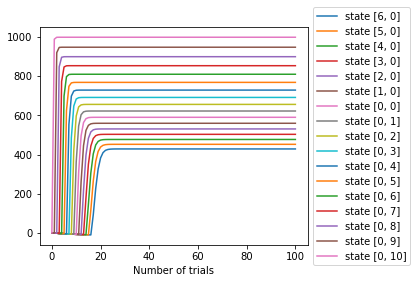

In [4]:
import matplotlib.pyplot as plt
utilities = agent.get_utilities()
visited_states = agent.get_visited_state()

fig = plt.figure()
ax = plt.subplot(111)
for i in range(len(visited_states)):
    plt.plot(utilities[i], label="state "+str(visited_states[i]))

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Number of trials")
plt.show()

The convergence is obtained after more or less 20 games

In [5]:
states = agent.get_visited_state()
utilities = agent.get_utilities()
for i in range(row):
    for j in range(col):
        if [i, j] in states:
            print("{:<8}".format(str(round(utilities[states.index([i, j])][-1], 2))), end=" ")
        else:
            print("{:<8}".format(""), end=" ")
    print()

590.71   622.85   656.69   692.3    729.79   769.26   810.8    854.52   900.55   949.0    1000.0            
560.18                                                                                                      
531.17                                                                                                      
503.61                                                                                                      
477.43                                                                                                      
452.56                                                                                                      
428.93                                                                                                      


# Passive learning with a random policy

In [6]:
from environment import SimpleMaze
from passive_agent import PassiveAgentTD, actions

row, col = 7, 12

env = SimpleMaze(row, col)
env.render()

0	|.|.|.|.|.|.|.|.|.|.|.|E|
1	|.|.|.|.|.|.|.|.|.|.|.|.|
2	|.|.|.|.|.|.|.|.|.|.|.|.|
3	|.|.|.|.|.|.|.|.|.|.|.|.|
4	|.|.|.|.|.|.|.|.|.|.|.|.|
5	|.|.|.|.|.|.|.|.|.|.|.|.|
6	|C|.|.|.|.|.|.|.|.|.|.|.|



In [7]:
agent = PassiveAgentTD(env, 500, seed=0, gamma=0.95, random_policy=True, debug=False)
agent.learning()

right policy: north
random: 0.8444218515250481
p = 1.0
action choisi: north

right policy: north
random: 0.7579544029403025
p = 1.0
action choisi: north

right policy: north
random: 0.420571580830845
p = 1.0
action choisi: north

right policy: north
random: 0.25891675029296335
p = 1.0
action choisi: north

right policy: north
random: 0.5112747213686085
p = 1.0
action choisi: north

right policy: north
random: 0.4049341374504143
p = 1.0
action choisi: north

right policy: east
random: 0.7837985890347726
p = 1.0
action choisi: east

right policy: east
random: 0.30331272607892745
p = 1.0
action choisi: east

right policy: east
random: 0.4765969541523558
p = 1.0
action choisi: east

right policy: east
random: 0.5833820394550312
p = 1.0
action choisi: east

right policy: east
random: 0.9081128851953352
p = 1.0
action choisi: east

right policy: east
random: 0.5046868558173903
p = 1.0
action choisi: east

right policy: east
random: 0.28183784439970383
p = 1.0
action choisi: east

right polic

In [8]:
states = agent.get_visited_state()
utilities = agent.get_utilities()
for i in range(row):
    for j in range(col):
        if [i, j] in states:
            print("{:<8}".format(str(round(utilities[states.index([i, j])][-1], 2))), end=" ")
        else:
            print("{:<8}".format(""), end=" ")
    print()

-8.79    14.42    5.48     1.79     10.86    29.81    54.65    78.77    117.37   267.95   767.77   0        
-7.36    0.07     0.37     1.98     5.03     9.79     13.55    86.82    110.35   174.76   440.52   282.81   
-11.0    -10.18   0.38     2.34     6.23     14.41    15.57    52.68    140.69   234.34   155.41   23.16    
-11.97   -9.8     -6.03    4.11     8.82     34.62    51.72    71.97    25.42    126.42   105.79   73.89    
-13.63   -11.63   -10.01   -11.49   5.61     7.94     6.38     2.33     45.21    20.73    5.05     30.4     
-13.78   -12.21   -12.82   -12.9    -11.32   -11.44            -0.81    10.33    6.74     -4.36    -0.35    
-14.33   -13.54   -13.31   -12.18   -11.5    -14.12            -2.89    -2.09    5.24     -8.47    -6.36    


# Maze environment

In [14]:
from environment import Maze

env = Maze(13, 30)
env.render()

##############################
#.#.........................##
#.#.#####.#################.##
#.#.#...#...#.............#.##
#.#.#.#.###.###.#####.#####.##
#.#...#...#...#...#.#.......##
#.#######.###.###.#.##########
#.........#...#...#.........##
#.#########.#####.#####.###.##
#.#.....#...#...#.....#.#...##
#.###.#.#.###.#.#####.###.#.##
#.....#E#.....#..S#.......#.##
##############################
